# Exploring Naive Bayes: Theory, Applications, and Performance Analysis

**Name**:  Conor Brooke  
**Student-ID**:  C00260735  
**Date**:  01/02/2024  
**Link To Notebook Followed**:  [GitHub Repository](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb)  

  
## Notebook Overview
This notebook provides a in depth exploration of the Naive Bayes algorithm, a popular classification technique based on Bayes' Theorem. The notebook covers the theory behind Naive Bayes and demonstrates its application using different datasets, including 'survey_lung_cancer.csv' for Gaussian Naive Bayes and 'spam.csv' for email filtering. The main objectives of this analysis are to understand the mechanics of Naive Bayes, to apply it to different types of data, and to evaluate its performance in classification tasks.

## Modifications Log
- **[29/01/2024]**: Initial creation; modifications to intruduction and explanation of Naive Bayes Classification.

<br>

# CRISP-DM Project Log

## Business Understanding
- **Objective Definition**: _[Detail the specific objectives of this notebook, including the questions you aim to answer or the predictions you intend to make.]_
- **Project Requirements**: _[Summarize the key requirements from the project brief that this notebook addresses.]_

## Data Understanding
- **Initial Data Collection Report**: _[Describe the sources of your data, how it was collected, and any initial observations.]_
- **Data Description**: _[Provide a summary of the dataset(s) used, including size, features, and target variables.]_
- **Exploratory Data Analysis (EDA)**: _[Summarize the EDA conducted, including any interesting findings or patterns observed in the data.]_

## Data Preparation
- **Data Cleaning Steps**: _[Detail the data cleaning process, including handling of missing values, outliers, etc.]_
- **Feature Engineering and Selection**: _[Describe any new features created, features selected for the model, and the rationale behind these choices.]_
- **Data Splitting Methodology**: _[Explain how the data was split into training, validation, and test sets, including any strategies used to ensure balance or representativeness.]_

## Modeling
- **Model Selection**: _[Detail the machine learning algorithms considered and the reasons for selecting the final model(s).]_
- **Model Building and Tuning**: _[Describe the process of building the model, including any parameter tuning or cross-validation techniques used.]_
- **Modeling Challenges**: _[Discuss any challenges faced during modeling and how they were addressed.]_

## Evaluation
- **Evaluation Metrics Used**: _[Specify the metrics used to evaluate the model's performance and the rationale for their selection.]_
- **Model Performance Results**: _[Present the results of the model's performance on the training, validation, and test sets.]_
- **Model Interpretation**: _[Interpret the model's outcomes, including any insights gained from the model's predictions or errors.]_

## Deployment
- **Deployment Strategy**: _[Outline the approach for deploying the model, including any platforms, tools, or technologies used.]_
- **Challenges and Solutions**: _[Detail any challenges encountered during deployment and how they were resolved.]_
- **Future Work**: _[Discuss any potential improvements, additional features, or further research that could be conducted to enhance the project.]_

<br>
<br>

> **Note**: This notebook is part of my Data Science Continuous Assessment portfolio. It has been enhanced significantly from the original version cloned from GitHub to deepen both theoretical and practical understanding of the underlying machine learning algorithm(s). Each change is documented in the log above to track the evolution of the notebook and analyze the impact of modifications on the algorithm's performance.
  

<br>
<br>

# Naive Bayes Classification - Explained

In this notebook, we will delve into an in-depth examination of various algorithms and datasets through the lens of Naive Bayes classification.

Naive Bayes models represent a collection of fast and simple classification algorithms that are often suitable in managing high-dimensional datasets. Their speed and minimal requirement for parameter tuning make them practical as an initial, benchmark for classification challenges. I will provide an intuitive explanation  of the mechanisms underpinning Naive Bayes classifiers, followed by practical demonstrations of their application across datasets.

## Bayesian Classification

Naive Bayes classifiers are a simple way to predict a category based on some features, using a principle called Bayesian classification. This method uses Bayes's theorem, a formula that helps us understand how likely something is, given certain conditions. In essence, it calculates the probability of a category (or label) given some observed features, we can write as $P(L~|~{\rm features})$.
  
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

### Example

Suppose we want to predict the likelihood of getting lung cancer based on whether someone smokes.

**Features**: Smoking status (smoker or non-smoker).

**Label**: Lung cancer risk (high or low).

Let's apply Bayes' theorem to assess the risk of lung cancer based on smoking status with some hypothetical statistics.

- **Given Information**:
  - The overall probability of having lung cancer (P(Lung Cancer)) is 0.01, or 1% of the population.
  - The probability of being a smoker (P(Smoker)) is 0.2, or 20% of the population.
  - The probability of having lung cancer given that you are a smoker (P(Lung Cancer | Smoker)) is 0.02, or 2% of smokers have lung cancer.

We aim to determine the probability that an individual is a smoker, given they have been diagnosed with lung cancer. This is mathematically represented as \(P(\text{Smoker} | \text{Lung Cancer})\).

### Using Bayes' Theorem

Bayes' theorem allows us to compute this probability as follows:

$$
P(\text{Smoker} | \text{Lung Cancer}) = \frac{P(\text{Lung Cancer} | \text{Smoker}) \times P(\text{Smoker})}{P(\text{Lung Cancer})}
$$

**Plugging in the given values**:

$$
P(\text{Smoker} | \text{Lung Cancer}) = \frac{0.02 \times 0.2}{0.01}
$$

After performing the calculation:

$$
P(\text{Smoker} | \text{Lung Cancer}) = 0.4
$$

This means that among individuals diagnosed with lung cancer, there is a 40% probability that they are smokers, according to the provided sample statistics.


<br>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\c_bro\AppData\Local\Temp\ipykernel_23436\1505719282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

## Understanding Gaussian Naive Bayes

Gaussian Naive Bayes is the simplest type of Naive Bayes classifier. It works on the idea that the data for each category comes from a normal (or Gaussian) distribution. The Gaussian distribution, is a bell-shaped curve that describes how a set of data is spread out, with most values clustering around a central mean and fewer occurring as you move away.

## Lung Cancer Prediction Using Gaussian Naive Bayes

**Link To Kaggle Dataset**:  [Lung Cancer Dataset](https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/data) 

### Data Understading

In [4]:
lung_cancer_dataset = pd.read_csv('Datasets/survey lung cancer.csv')
lung_cancer_dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
lung_cancer_dataset.duplicated().sum()

33

In [6]:
#Checking for null values
lung_cancer_dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
lung_cancer_dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
lung_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Both Gender and Lung_Cancer are of type object, changes must be made to these features during preprocessing.

#### Exploratory Data Analysis

Plotting the distribution between male and female with lung cancer

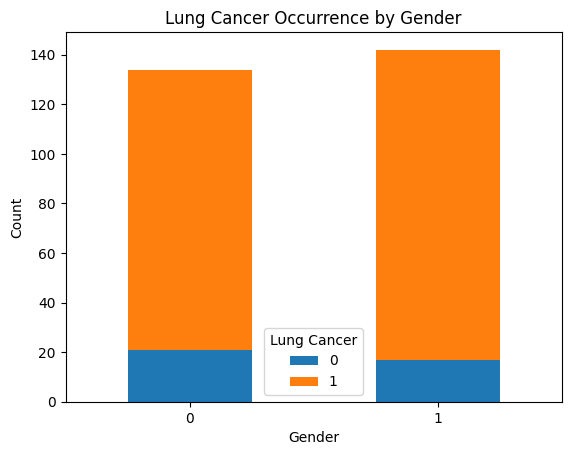

In [14]:

lung_cancer_counts = lung_cancer_dataset.groupby(['GENDER', 'LUNG_CANCER']).size().unstack(fill_value=0)

# Plotting with seaborn for a more appealing visualization
lung_cancer_counts.plot(kind='bar', stacked=True)
plt.title('Lung Cancer Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotates the x-axis labels to be horizontal
plt.legend(title='Lung Cancer')
plt.show()

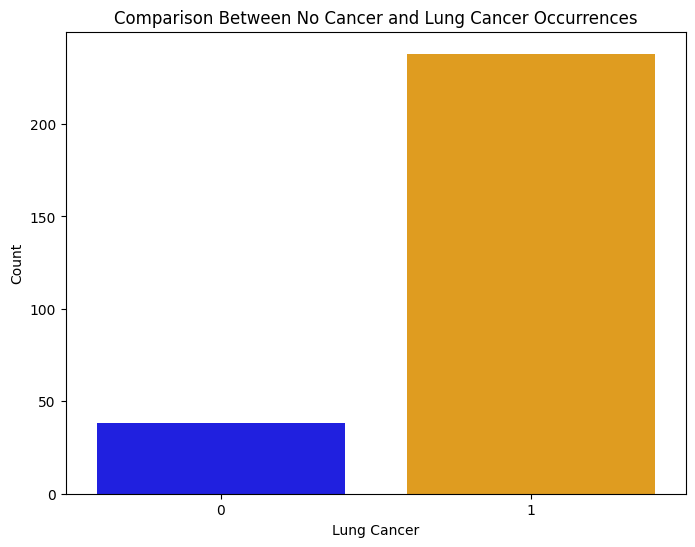

In [26]:
import seaborn as sns
lung_cancer_counts = lung_cancer_dataset['LUNG_CANCER'].value_counts()

# Plotting the counts
plt.figure(figsize=(8, 6))  # Sets the figure size for better readability
sns.barplot(x=lung_cancer_counts.index, y=lung_cancer_counts.values, palette=['blue', 'orange'])
plt.title('Comparison Between No Cancer and Lung Cancer Occurrences')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()

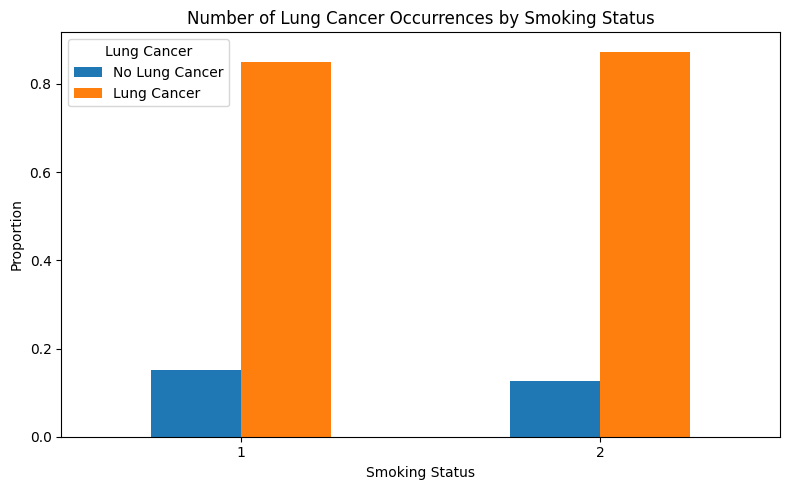

In [22]:
lung_cancer_dataset.groupby('SMOKING')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))
# Adding labels and title
plt.title('Number of Lung Cancer Occurrences by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

# Adding a legend to clarify what 'Yes' and 'No' refer to
plt.legend(title='Lung Cancer', labels=['No Lung Cancer', 'Lung Cancer'])

# Show plot
plt.tight_layout()
plt.show()

### Correlation between features

In [29]:
# Correlation for numerical features
correlations = lung_cancer_dataset.corr()['LUNG_CANCER'].sort_values()

print("Correlation with Lung_Cancer:\n", correlations)

Correlation with Lung_Cancer:
 SMOKING                  0.034878
GENDER                   0.053666
SHORTNESS OF BREATH      0.064407
AGE                      0.106305
CHRONIC DISEASE          0.143692
ANXIETY                  0.144322
FATIGUE                  0.160078
YELLOW_FINGERS           0.189192
CHEST PAIN               0.194856
PEER_PRESSURE            0.195086
WHEEZING                 0.249054
COUGHING                 0.253027
SWALLOWING DIFFICULTY    0.268940
ALCOHOL CONSUMING        0.294422
ALLERGY                  0.333552
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64


Oddly enough, smoking has a low correlation with 'Lung Cancer' in this dataset. This could be for many reasons like the way smoking is measured (e.g., binary yes/no instead of pack-years) might not capture the true extent of exposure or the presence of other confounding variables.

### Data preprocessing

Dropping duplicates

In [10]:
#Removing Duplicates
lung_cancer_dataset = lung_cancer_dataset.drop_duplicates()

For the Gender column, I mapped the values 'M' and 'F' to integers (0 and 1). For the Lung_Cancer column, containing values 'Yes' and 'No', I also map these to integers (1 for 'Yes' and 0 for 'No').

In [11]:
# Convert 'Gender' to int: Male=0, Female=1
lung_cancer_dataset['GENDER'] = lung_cancer_dataset['GENDER'].map({'M': 1, 'F': 0})

# Convert 'Lung_Cancer' to int: No=0, Yes=1
lung_cancer_dataset['LUNG_CANCER'] = lung_cancer_dataset['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [12]:
lung_cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Dropping columns with a low correlation

In [30]:
df_new = lung_cancer_dataset.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])

In [31]:
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,2,1,1,2,1,2,2,2,2,2,1
1,1,1,1,2,2,2,1,1,1,2,2,1
2,1,1,2,1,2,1,2,1,2,1,2,0
3,2,2,1,1,1,1,1,2,1,2,2,0
4,2,1,1,1,1,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,2,2,1,1,2,2,1,2,2,1,1
280,1,1,1,2,2,2,1,1,1,1,1,0
281,1,1,1,1,2,2,1,1,1,1,2,0
282,2,2,1,1,1,1,1,1,1,2,2,0


## Modeling

In [32]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

### Gaussian Naive Bayes

In [34]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set(20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


#### Fitting Gaussian Naive Bayes classifier to the training set 

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [36]:
#Predicting output using test data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Evaluation

Calculate the Confusion Matrix


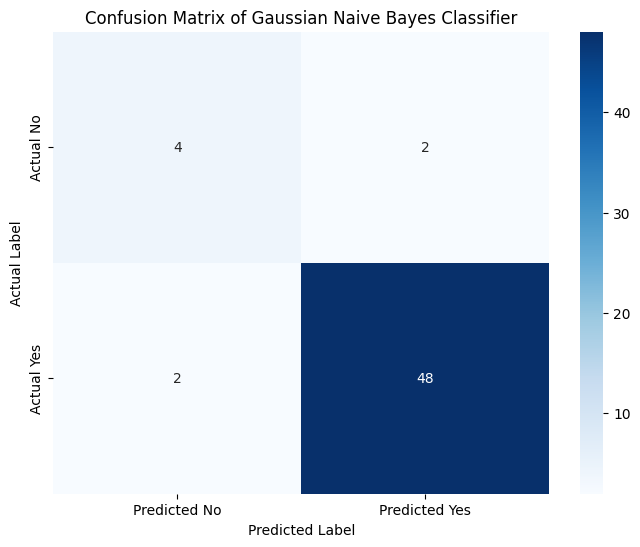

In [37]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_gnb_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Gaussian Naive Bayes Classifier')
plt.show()
